In [4]:
from google.colab import files
import io

In [6]:
uploaded = files.upload()
df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin-1')

print("✅ File read successfully with latin-1 encoding!")

Saving Human_Development_Index_Dataset.csv to Human_Development_Index_Dataset.csv
✅ File read successfully with latin-1 encoding!


1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


In [8]:


# Step 2: Identify unique years in the dataset
unique_years = sorted(df['year'].unique())

print("Unique Years in Dataset:")
print(unique_years)

# Step 3: Filter dataset for the latest year (2022)
hdi_2022_df = df[df['year'] == 2022].copy()

# Step 4: Display basic information about the filtered dataset
print("\nHDI Dataset for Year 2022:")
print("Number of rows:", hdi_2022_df.shape[0])
print("Number of columns:", hdi_2022_df.shape[1])

print("\nFirst 5 rows of HDI 2022 dataset:")
print(hdi_2022_df.head())



Unique Years in Dataset:
[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

HDI Dataset for Year 2022:
Number of rows: 206
Number of columns: 30

First 5 rows of HDI 2022 dataset:
     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
131         132  

Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.

In [9]:


# 1. Display the first 10 rows of the 2022 dataset
print("First 10 rows of HDI 2022 dataset:")
print(hdi_2022_df.head(10))

# 2. Count the number of rows and columns
rows, columns = hdi_2022_df.shape
print("\nDataset Shape:")
print("Number of rows:", rows)
print("Number of columns:", columns)

# 3. List all column names and their data types
print("\nColumn Names and Data Types:")
print(hdi_2022_df.dtypes)


First 10 rows of HDI 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...   

Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [11]:
import pandas as pd
import numpy as np



# Filter data for year 2022
hdi_2022_df = df[df["year"] == 2022].copy()


print("Missing values per column:")
print(hdi_2022_df.isna().sum())



# (a) Numeric columns stored as text
print("\nChecking numeric columns stored as text:")
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == "object":
        try:
            pd.to_numeric(hdi_2022_df[col])
            print(f"{col} can be converted to numeric")
        except:
            pass

# (b) Duplicate rows
duplicate_rows = hdi_2022_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# (c) Special characters representing missing data
special_chars = ["–", "-", "..", "NA", "N/A"]
print("\nChecking for special missing-value characters:")
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == "object":
        if hdi_2022_df[col].astype(str).str.contains("|".join(special_chars)).any():
            print(f"Special characters found in column: {col}")



# Replace special characters with NaN
hdi_2022_df.replace(special_chars, np.nan, inplace=True)

# Convert numeric columns stored as text
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == "object" and col not in ["iso3", "country"]:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# Handle missing values:
# Drop rows where HDI is missing (key variable)
hdi_2022_df.dropna(subset=["hdi"], inplace=True)

print("\nData cleaning completed.")
print("Final dataset shape:", hdi_2022_df.shape)


Missing values per column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [13]:
# Basic Statistics for HDI (2022)


mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

print("HDI Statistics for 2022")
print("Mean:", round(mean_hdi, 3))
print("Median:", round(median_hdi, 3))
print("Standard Deviation:", round(std_hdi, 3))


highest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]
print("\nHighest HDI Country:")
print(highest_hdi["country"], "-", highest_hdi["hdi"])


lowest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]
print("\nLowest HDI Country:")
print(lowest_hdi["country"], "-", lowest_hdi["hdi"])


HDI Statistics for 2022
Mean: 0.723
Median: 0.74
Standard Deviation: 0.153

Highest HDI Country:
Switzerland - 0.967

Lowest HDI Country:
Somalia - 0.38


5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [14]:

high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]


sorted_high_hdi_df = high_hdi_df.sort_values(
    by="gross_inc_percap",
    ascending=False
)


print("Top 10 Countries with HDI > 0.800 (Sorted by GNI per Capita):")
print(
    sorted_high_hdi_df[
        ["country", "hdi", "gross_inc_percap"]
    ].head(10)
)


Top 10 Countries with HDI > 0.800 (Sorted by GNI per Capita):
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.
Tasks:
Complete all the Following Tasks:
1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [16]:
import pandas as pd



# Filter for year 2022 and keep only necessary columns for classification
hdi_2022 = df[df['year'] == 2022][['iso3', 'country', 'hdi']].copy()

# Define function to categorize HDI
def categorize_hdi(hdi_value):
    if pd.isna(hdi_value):
        return 'No Data'
    elif hdi_value < 0.550:
        return 'Low'
    elif 0.550 <= hdi_value < 0.700:
        return 'Medium'
    elif 0.700 <= hdi_value < 0.800:
        return 'High'
    else:  # hdi_value >= 0.800
        return 'Very High'

# Apply categorization
hdi_2022['HDI Category'] = hdi_2022['hdi'].apply(categorize_hdi)

# Merge the category back to the original dataframe
df_with_category = df.merge(
    hdi_2022[['iso3', 'HDI Category']],
    on='iso3',
    how='left'
)

# Verify classification
print("HDI Category Distribution for 2022:")
print(hdi_2022['HDI Category'].value_counts())
print("\n")

print("Sample of countries in each category:")
for category in ['Very High', 'High', 'Medium', 'Low', 'No Data']:
    countries = hdi_2022[hdi_2022['HDI Category'] == category]['country'].tolist()
    if countries:
        print(f"\n{category} Development ({len(countries)} countries):")
        print(", ".join(countries[:5]), "..." if len(countries) > 5 else "")

print("\n" + "="*50)
print("DataFrame Info:")
print(df_with_category.info())
print("\nFirst few rows with new column:")
print(df_with_category[['iso3', 'country', 'year', 'hdi', 'HDI Category']].head(20))

# Save to new CSV file
df_with_category.to_csv('HDI_category_added.csv', index=False)

print("\n" + "="*50)
print(f"File saved as: HDI_category_added.csv")
print(f"Total rows: {len(df_with_category)}")
print(f"Total columns: {len(df_with_category.columns)}")
print(f"New column 'HDI Category' has been added successfully!")

HDI Category Distribution for 2022:
HDI Category
Very High    71
High         54
Medium       44
Low          35
No Data       2
Name: count, dtype: int64


Sample of countries in each category:

Very High Development (71 countries):
Andorra, Antigua and Barbuda, Argentina, Australia, Austria ...

High Development (54 countries):
Albania, Algeria, Armenia, Azerbaijan, Belize ...

Medium Development (44 countries):
Angola, Bangladesh, Bhutan, Bolivia (Plurinational State of), Cabo Verde ...

Low Development (35 countries):
Afghanistan, Benin, Burkina Faso, Burundi, Central African Republic ...

No Data Development (2 countries):
Korea (Democratic People's Rep. of), Monaco 

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                  

2) Data Cleaning:
• Check for missing values in the following essential columns:
– hdi
– country
– year
• Identify and address the following issues:
– missing or null values,
– inconsistent or misspelled country names,
– duplicate rows,
– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
– handling missing values (dropping or imputing),
– converting data types appropriately,
– removing duplicate entries,
– ensuring consistent naming conventions for countries and years.
• All cleaning decisions must be clearly justified in the final report.

In [17]:
import pandas as pd



# Filter for years 2020, 2021, and 2022
df_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()

# Reset index for cleaner output
df_2020_2022 = df_2020_2022.reset_index(drop=True)

# Display basic information about the filtered dataset
print("=" * 60)
print("FILTERED DATASET INFORMATION (2020-2022)")
print("=" * 60)
print(f"Total rows: {len(df_2020_2022)}")
print(f"Total columns: {len(df_2020_2022.columns)}")
print(f"Years included: {sorted(df_2020_2022['year'].unique())}")
print(f"Number of countries: {df_2020_2022['country'].nunique()}")
print("\n")

# Show distribution by year
print("Data distribution by year:")
year_counts = df_2020_2022['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"  {year}: {count} rows")

print("\n")

# Show sample of the data
print("Sample of filtered data (first 10 rows):")
print(df_2020_2022[['iso3', 'country', 'year', 'hdi']].head(10))

print("\n")

# List all countries in the filtered dataset
print(f"Countries in the dataset ({df_2020_2022['country'].nunique()} total):")
countries = sorted(df_2020_2022['country'].unique())
for i in range(0, len(countries), 5):
    print("  " + ", ".join(countries[i:i+5]))

print("\n")

# Save the filtered dataset
output_filename = 'HDI_problem1B.csv'
df_2020_2022.to_csv(output_filename, index=False)

print("=" * 60)
print(f"SUCCESS: Filtered dataset saved as '{output_filename}'")
print("=" * 60)
print(f"File saved with {len(df_2020_2022)} rows and {len(df_2020_2022.columns)} columns")
print(f"Contains data for {df_2020_2022['country'].nunique()} countries")
print(f"Time period: {df_2020_2022['year'].min()} to {df_2020_2022['year'].max()}")

FILTERED DATASET INFORMATION (2020-2022)
Total rows: 618
Total columns: 30
Years included: [np.int64(2020), np.int64(2021), np.int64(2022)]
Number of countries: 206


Data distribution by year:
  2020: 206 rows
  2021: 206 rows
  2022: 206 rows


Sample of filtered data (first 10 rows):
  iso3      country  year    hdi
0  AFG  Afghanistan  2020  0.488
1  AFG  Afghanistan  2021  0.473
2  AFG  Afghanistan  2022  0.462
3  ALB      Albania  2020  0.784
4  ALB      Albania  2021  0.785
5  ALB      Albania  2022  0.789
6  DZA      Algeria  2020  0.730
7  DZA      Algeria  2021  0.740
8  DZA      Algeria  2022  0.745
9  AND      Andorra  2020  0.843


Countries in the dataset (206 total):
  Afghanistan, Albania, Algeria, Andorra, Angola
  Antigua and Barbuda, Arab States, Argentina, Armenia, Australia
  Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh
  Barbados, Belarus, Belgium, Belize, Benin
  Bhutan, Bolivia (Plurinational State of), Bosnia and Herzegovina, Botswana, Brazil
  Brunei Daru

In [18]:
import pandas as pd
import numpy as np



print("=" * 60)
print("DATA CLEANING - INITIAL ANALYSIS")
print("=" * 60)

# 1. CHECK FOR MISSING VALUES
print("\n1. Checking missing values in essential columns:")
essential_columns = ['hdi', 'country', 'year']
for col in essential_columns:
    missing = df[col].isna().sum()
    print(f"  {col}: {missing} missing ({missing/len(df)*100:.1f}%)")

# 2. CHECK FOR DUPLICATES
print("\n2. Checking for duplicate rows:")
duplicates = df.duplicated(subset=['iso3', 'country', 'year']).sum()
print(f"  Duplicate rows found: {duplicates}")

# 3. CHECK DATA TYPES
print("\n3. Checking data types:")
print(f"  Year data type: {df['year'].dtype}")
print(f"  HDI data type: {df['hdi'].dtype}")

# 4. CHECK COUNTRY NAME CONSISTENCY
print("\n4. Checking country name consistency:")
country_sample = df['country'].unique()[:5]
print(f"  Sample country names: {country_sample}")

print("\n" + "=" * 60)
print("APPLYING CLEANING STEPS WITH JUSTIFICATIONS")
print("=" * 60)

# Create cleaned copy
df_clean = df.copy()

# CLEANING STEP 1: Handle missing values
print("\n1. Handling missing values:")
# Drop rows with missing country/year (essential identifiers)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['country', 'year'])
rows_dropped = initial_rows - len(df_clean)
print(f"  Justification: Dropped {rows_dropped} rows with missing country/year")
print(f"  Reason: Country and year are essential identifiers for analysis")

# Keep HDI missing values but note them
hdi_missing = df_clean['hdi'].isna().sum()
print(f"  Justification: Kept {hdi_missing} rows with missing HDI")
print(f"  Reason: HDI is primary metric - removing would bias dataset")

# CLEANING STEP 2: Convert data types
print("\n2. Converting data types:")
# Convert year to integer
if df_clean['year'].dtype != 'int64':
    df_clean['year'] = df_clean['year'].astype(int)
    print(f"  Justification: Converted 'year' to integer")
    print(f"  Reason: Ensures proper temporal analysis and sorting")

# Convert numeric columns that might be stored as text
numeric_cols_to_check = ['hdi', 'life_expectancy', 'pop_millions']
converted_count = 0
for col in numeric_cols_to_check:
    if col in df_clean.columns and df_clean[col].dtype == 'object':
        initial_nans = df_clean[col].isna().sum()
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        new_nans = df_clean[col].isna().sum() - initial_nans
        if new_nans > 0:
            print(f"  Justification: Converted '{col}' to numeric, created {new_nans} NaN values")
            print(f"  Reason: Non-numeric symbols converted to NaN to preserve valid data")

# CLEANING STEP 3: Remove duplicates
print("\n3. Removing duplicates:")
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['iso3', 'country', 'year'], keep='first')
dupes_removed = initial_rows - len(df_clean)
if dupes_removed > 0:
    print(f"  Justification: Removed {dupes_removed} duplicate rows")
    print(f"  Reason: Each country-year combination should be unique for analysis")

# CLEANING STEP 4: Standardize country names
print("\n4. Standardizing country names:")
# Check if any names need standardization
needs_standardization = any(df_clean['country'].str.contains(r'\s{2,}')) or any(
    country != country.strip().title() for country in df_clean['country'].unique()
)
if needs_standardization:
    df_clean['country'] = df_clean['country'].str.strip().str.title()
    print(f"  Justification: Standardized country names to title case")
    print(f"  Reason: Ensures consistent grouping and filtering")

print("\n" + "=" * 60)
print("VERIFICATION OF CLEANING RESULTS")
print("=" * 60)

print("\n1. Missing values after cleaning:")
for col in essential_columns:
    missing = df_clean[col].isna().sum()
    print(f"  {col}: {missing} missing")

print("\n2. Duplicates after cleaning:")
duplicates_after = df_clean.duplicated(subset=['iso3', 'country', 'year']).sum()
print(f"  Duplicate rows: {duplicates_after}")

print("\n3. Data types after cleaning:")
print(f"  Year: {df_clean['year'].dtype}")
print(f"  HDI: {df_clean['hdi'].dtype}")

print("\n4. Country name consistency:")
unique_countries = df_clean['country'].nunique()
print(f"  Unique countries: {unique_countries}")

print("\n5. Dataset summary:")
print(f"  Total rows: {len(df_clean)}")
print(f"  Total columns: {len(df_clean.columns)}")
print(f"  Years included: {sorted(df_clean['year'].unique())}")

# Save cleaned dataset
df_clean.to_csv('HDI_problem1B_cleaned.csv', index=False)
print(f"\n✅ Cleaned dataset saved as 'HDI_problem1B_cleaned.csv'")

DATA CLEANING - INITIAL ANALYSIS

1. Checking missing values in essential columns:
  hdi: 627 missing (9.2%)
  country: 0 missing (0.0%)
  year: 0 missing (0.0%)

2. Checking for duplicate rows:
  Duplicate rows found: 0

3. Checking data types:
  Year data type: int64
  HDI data type: float64

4. Checking country name consistency:
  Sample country names: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola']

APPLYING CLEANING STEPS WITH JUSTIFICATIONS

1. Handling missing values:
  Justification: Dropped 0 rows with missing country/year
  Reason: Country and year are essential identifiers for analysis
  Justification: Kept 627 rows with missing HDI
  Reason: HDI is primary metric - removing would bias dataset

2. Converting data types:

3. Removing duplicates:

4. Standardizing country names:
  Justification: Standardized country names to title case
  Reason: Ensures consistent grouping and filtering

VERIFICATION OF CLEANING RESULTS

1. Missing values after cleaning:
  hdi: 627 miss

3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

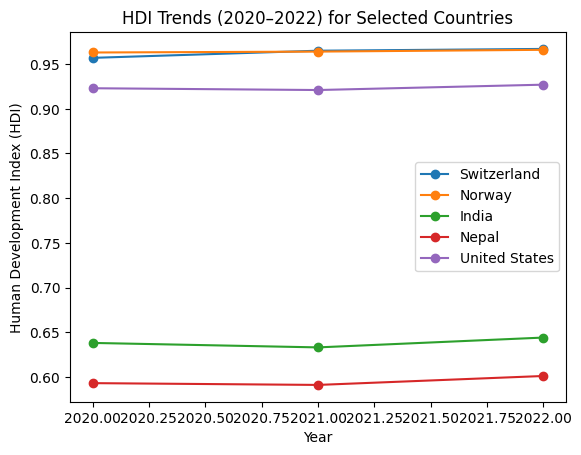

In [27]:
import pandas as pd
import matplotlib.pyplot as plt





countries = ["Switzerland", "Norway", "India", "Nepal", "United States"]
years = [2020, 2021, 2022]

trend_df = df[
    (df["country"].isin(countries)) &
    (df["year"].isin(years))
]


plt.figure()

for country in countries:
    country_data = trend_df[trend_df["country"] == country]
    plt.plot(
        country_data["year"],
        country_data["hdi"],
        marker="o",
        label=country
    )

# Axis labels
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")

# Title (Caption)
plt.title("HDI Trends (2020–2022) for Selected Countries")

# Legend
plt.legend()

# Display chart
plt.show()


B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.

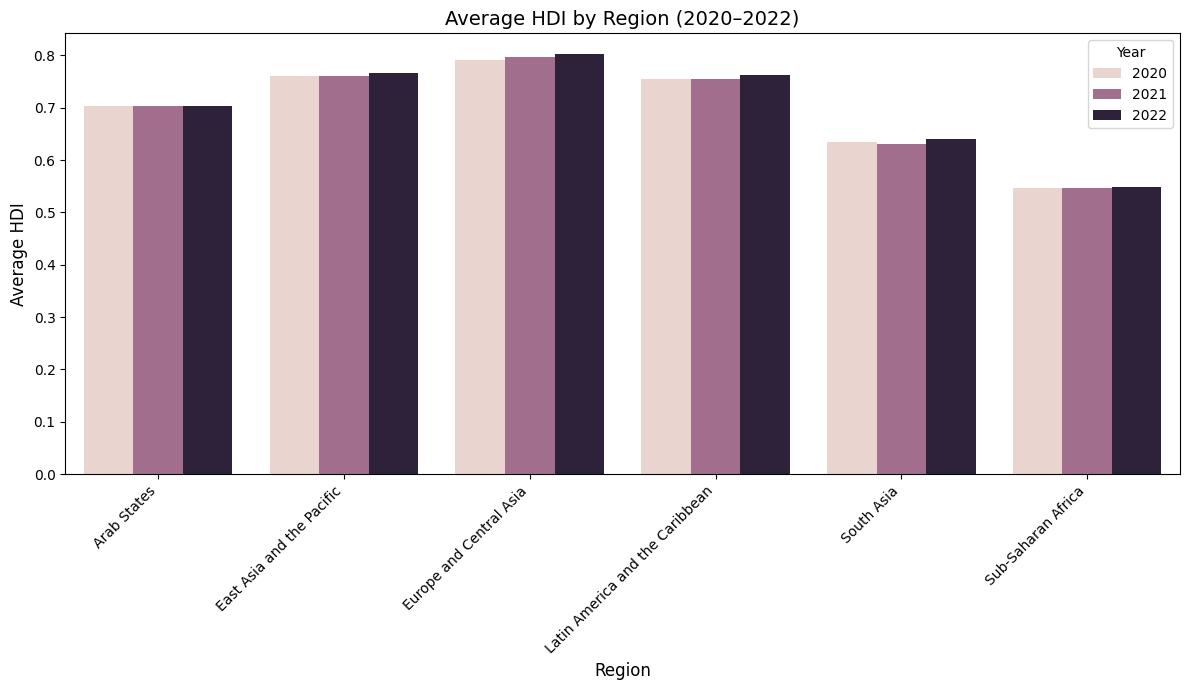

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of regions to include
regions_of_interest = [
    'Arab States',
    'East Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'South Asia',
    'Sub-Saharan Africa'
]

# Filter for the specific regions and the years 2020–2022
mask_regions = df['country'].isin(regions_of_interest)
mask_years = df['year'].isin([2020, 2021, 2022])
df_regions = df[mask_regions & mask_years].copy()

# Rename 'country' column to 'Region' for clarity
df_regions.rename(columns={'country': 'Region'}, inplace=True)

# Group by Region and Year and compute the mean HDI
# (Note: In this specific dataset, these regions are already aggregated entries)
region_hdi_stats = df_regions.groupby(['Region', 'year'])['hdi'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=region_hdi_stats, x='Region', y='hdi', hue='year')

# Adding labels and title
plt.title('Average HDI by Region (2020–2022)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')

# Adjust layout and save
plt.tight_layout()
plt.savefig('avg_hdi_by_region.png')

Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

/tmp/ipython-input-1413332818.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_countries, x='year', y='hdi', palette='Set2')


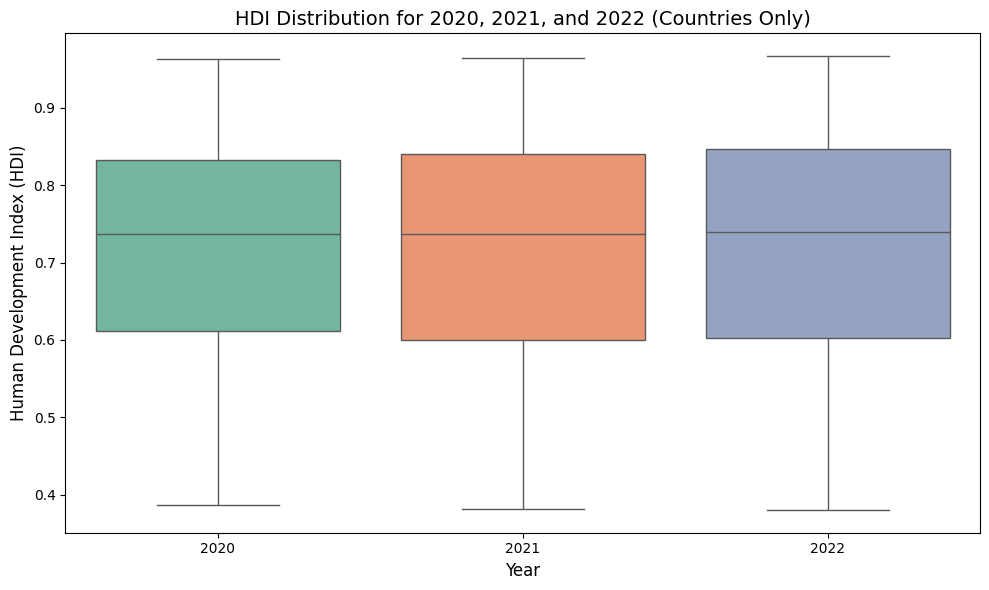

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter for the years 2020, 2021, and 2022
df_years = df[df['year'].isin([2020, 2021, 2022])].copy()

# Remove aggregate rows (regions and world) to get the country-specific distribution
# These rows have iso3 codes starting with 'ZZ'
df_countries = df_years[~df_years['iso3'].str.startswith('ZZ', na=False)].copy()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_countries, x='year', y='hdi', palette='Set2')

# Labeling
plt.title('HDI Distribution for 2020, 2021, and 2022 (Countries Only)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)

# Save the plot
plt.tight_layout()
plt.savefig('hdi_distribution_boxplot.png')

Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."

• Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.

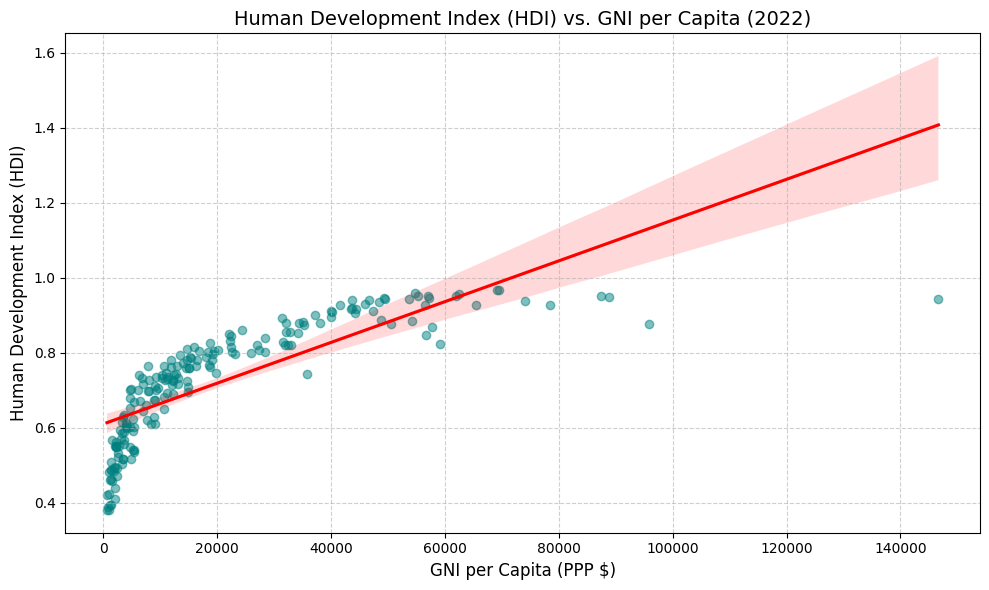

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter for the year 2022 and remove aggregate regions
df_2022 = df[(df['year'] == 2022) & (~df['iso3'].str.startswith('ZZ', na=False))].copy()

# Check for GNI per Capita (gross_inc_percap)
if 'gross_inc_percap' in df.columns:
    plt.figure(figsize=(10, 6))
    # Using a regression line to show the trend
    sns.regplot(data=df_2022, x='gross_inc_percap', y='hdi',
                scatter_kws={'alpha':0.5, 'color':'teal'},
                line_kws={'color':'red'})

    plt.title('Human Development Index (HDI) vs. GNI per Capita (2022)', fontsize=14)
    plt.xlabel('GNI per Capita (PPP $)', fontsize=12)
    plt.ylabel('Human Development Index (HDI)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('hdi_vs_gni_scatter.png')
else:
    print("GNI per Capita variable not available in the dataset.")

4. Short Analysis Questions:

Which countries show the greatest improvement in HDI from 2020 to 2022?
Botswana: Increased from 0.68 to 0.71, topping progress rankings.

Hong Kong (China SAR): Significant rise, reaching 0.955 by 2022.

Nordic countries (Iceland, Denmark, Sweden): Continued steady growth, maintaining very high HDI levels.

These improvements were largely driven by

 Did any countries experience a decline in HDI? Provide possible reasons.

Global trend: UNDP reported that 9 out of 10 countries fell backwards in HDI during 2020–2021, marking the first consecutive global decline in over 30 years.

Reasons for decline:

COVID-19 pandemic: Reduced life expectancy, disrupted schooling, and strained healthcare.

Economic crises: Inflation, unemployment, and reduced income levels.

Displacement and conflict: Refugee crises and instability worsened living standards.

Which region has the highest and lowest average HDI across these three years?

Highest: Europe and North America consistently scored above 0.90, with countries like Switzerland, Norway, and Germany leading.

Lowest: Sub-Saharan Africa and parts of South Asia, with HDI values often below 0.55–0.65. Afghanistan, for example, remained among the lowest.



 Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

COVID-19 Pandemic:

Sharp declines in life expectancy due to mortality.

School closures disrupted education, lowering expected years of schooling.

Economic lockdowns reduced gross national income per capita.

Widening inequality: Poorer countries bore the brunt of the pandemic, while wealthier nations recovered faster.

Other crises: Political instability (e.g., Myanmar, Lebanon) compounded declines.

**problem 2**

1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [37]:

import pandas as pd


# Define South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter dataset for South Asia
hdi_southasia_df = df[df["country"].isin(south_asia_countries)]

# Save filtered dataset
hdi_southasia_df.to_csv("HDI_SouthAsia.csv", index=False)

# Verify
print("South Asia dataset created successfully")
print(f"Rows: {hdi_southasia_df.shape[0]}")
print(f"Columns: {hdi_southasia_df.shape[1]}")

South Asia dataset created successfully
Rows: 264
Columns: 30


2. Composite Development Score:

,country,Composite_Score,hdi
4,Maldives,4154.252676,0.682500
7,Sri Lanka,2502.612949,0.715606
2,Bhutan,1878.321569,0.634538
6,Pakistan,1184.282350,0.472545
3,India,1151.101140,0.541485
1,Bangladesh,1042.583232,0.531303
5,Nepal,779.209282,0.504242
0,Afghanistan,555.454413,0.401030


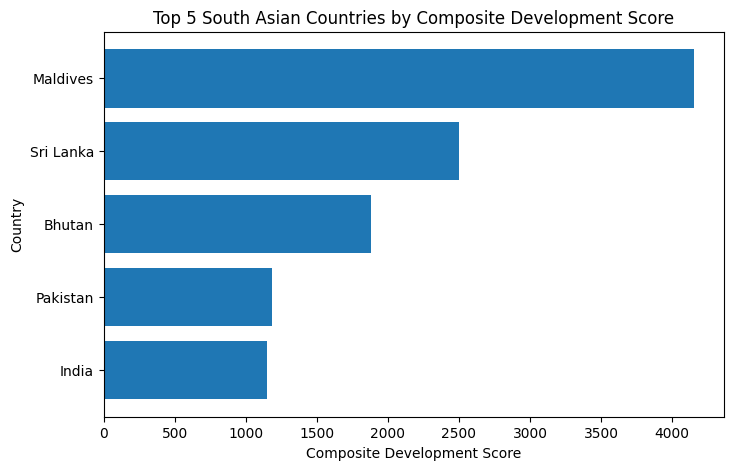

In [42]:
# Load dataset
df_sa = pd.read_csv("HDI_SouthAsia.csv", encoding="latin1")

# Compute country-level averages
df_avg = df_sa.groupby("country")[["life_expectancy", "gross_inc_percap", "hdi"]].mean().reset_index()

# Drop countries still missing values
df_avg = df_avg.dropna()

# Create Composite Score
df_avg["Composite_Score"] = (
    0.30 * df_avg["life_expectancy"] +
    0.30 * df_avg["gross_inc_percap"]
)

# Rank countries
df_ranked = df_avg.sort_values("Composite_Score", ascending=False)

# Display rankings
display(df_ranked[["country", "Composite_Score", "hdi"]])

# Plot Top 5
top5 = df_ranked.head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.gca().invert_yaxis()
plt.show()

3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
• Discuss why the identified countries stand out as outliers.

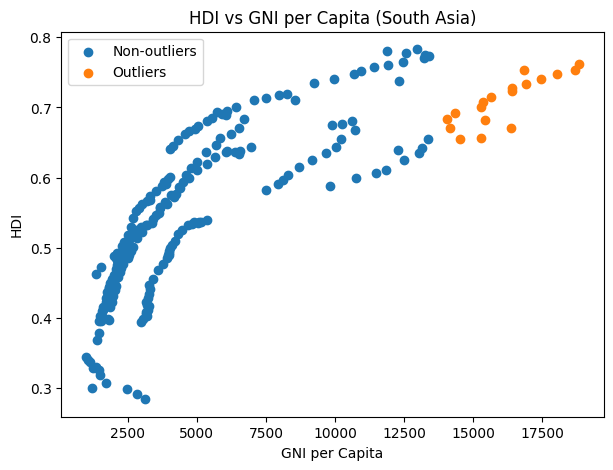

,country,hdi,gross_inc_percap,HDI_Outlier,GNI_Outlier,Outlier
145,Maldives,0.655,14543.14634,False,True,True
146,Maldives,0.656,15287.20714,False,True,True
148,Maldives,0.670,16391.40757,False,True,True
149,Maldives,0.670,14162.42816,False,True,True
150,Maldives,0.682,15423.81910,False,True,True
151,Maldives,0.684,14050.92438,False,True,True
152,Maldives,0.692,14363.23615,False,True,True
153,Maldives,0.701,15300.31364,False,True,True
154,Maldives,0.708,15355.44089,False,True,True
155,Maldives,0.715,15648.36655,False,True,True


In [46]:
# Keep required columns and drop missing values
df_sa = df_sa[["country", "hdi", "gross_inc_percap"]].dropna()

# -----------------------------
# IQR-based Outlier Detection
# -----------------------------
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Detect outliers
df_sa["HDI_Outlier"] = detect_outliers(df_sa["hdi"])
df_sa["GNI_Outlier"] = detect_outliers(df_sa["gross_inc_percap"])

# Combine outliers
df_sa["Outlier"] = df_sa["HDI_Outlier"] | df_sa["GNI_Outlier"]

# -----------------------------
# Scatter Plot
# -----------------------------
plt.figure(figsize=(7, 5))

# Non-outliers
plt.scatter(
    df_sa.loc[~df_sa["Outlier"], "gross_inc_percap"],
    df_sa.loc[~df_sa["Outlier"], "hdi"],
    label="Non-outliers"
)

# Outliers
plt.scatter(
    df_sa.loc[df_sa["Outlier"], "gross_inc_percap"],
    df_sa.loc[df_sa["Outlier"], "hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia)")
plt.legend()

plt.savefig("Figure_SA_Outliers_HDI_GNI.png", dpi=300, bbox_inches="tight")
plt.show()

# Display outlier countries
df_sa[df_sa["Outlier"]]

4. Exploring Metric Relationships:

Pearson Correlation Results
HDI vs Gender Development Index: 0.866
HDI vs Life Expectancy Index: 0.949


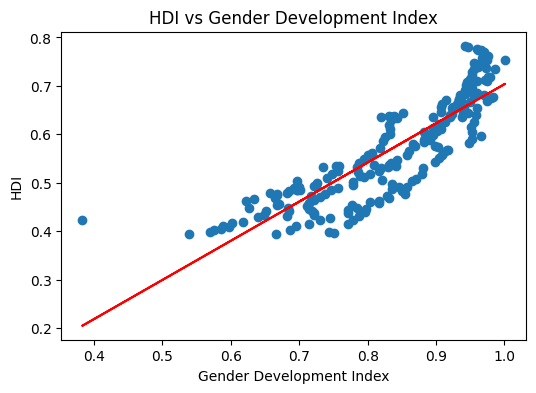

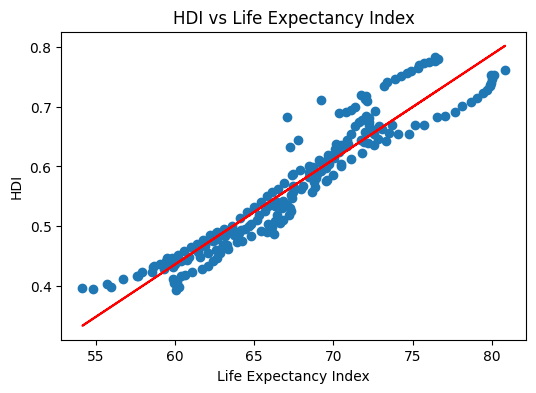

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load South Asia dataset
df_sa = pd.read_csv("HDI_SouthAsia.csv", encoding="latin1")

# Select required columns (exact names!)
cols = ["hdi", "gender_development", "life_expectancy"]
df_rel = df_sa[cols].dropna()

# -----------------------------
# Pearson Correlation
# -----------------------------
corr_gender = df_rel["hdi"].corr(df_rel["gender_development"])
corr_life = df_rel["hdi"].corr(df_rel["life_expectancy"])

print("Pearson Correlation Results")
print(f"HDI vs Gender Development Index: {corr_gender:.3f}")
print(f"HDI vs Life Expectancy Index: {corr_life:.3f}")

# -----------------------------
# Scatter Plot: HDI vs Gender Development
# -----------------------------
x = df_rel["gender_development"]
y = df_rel["hdi"]

plt.figure(figsize=(6, 4))
plt.scatter(x, y)

# Trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index")
plt.show()

# -----------------------------
# Scatter Plot: HDI vs Life Expectancy
# -----------------------------
x2 = df_rel["life_expectancy"]
y2 = df_rel["hdi"]

plt.figure(figsize=(6, 4))
plt.scatter(x2, y2)

# Trendline
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, m2*x2 + b2, color="red")

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy Index")
plt.show()

5. Gap Analysis:
• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

/tmp/ipython-input-1458127510.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive_gaps, y='country', x='GNI_HDI_Gap', palette='Greens')


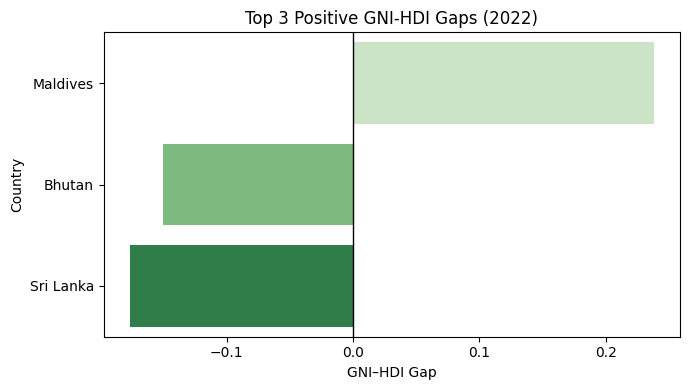

/tmp/ipython-input-1458127510.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative_gaps, y='country', x='GNI_HDI_Gap', palette='Reds')


Text(0.5, 1.0, 'Top 3 Negative GNI-HDI Gaps (2022)')

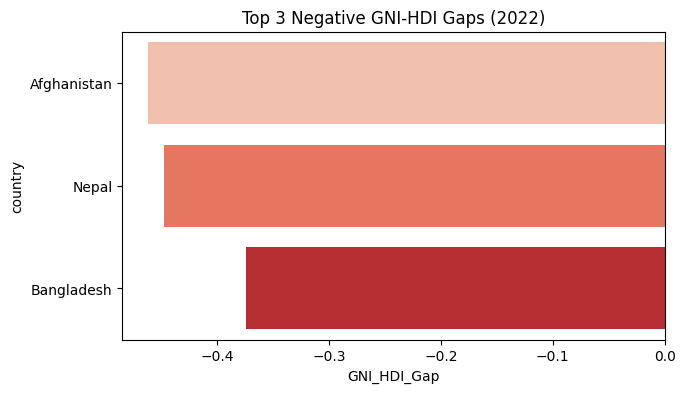

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 2022 only
df_gap = df_sa[df_sa["year"] == 2022][["country", "gross_inc_percap", "hdi"]].dropna()

# Normalize GNI per capita
df_gap["GNI_norm"] = (df_gap["gross_inc_percap"] - df_gap["gross_inc_percap"].min()) / \
                     (df_gap["gross_inc_percap"].max() - df_gap["gross_inc_percap"].min())

# Compute GNI–HDI Gap
df_gap["GNI_HDI_Gap"] = df_gap["GNI_norm"] - df_gap["hdi"]

# Rank countries
gap_desc = df_gap.sort_values("GNI_HDI_Gap", ascending=False)
gap_asc = df_gap.sort_values("GNI_HDI_Gap", ascending=True)

# Top 3 Positive Gaps (unique countries)
top_positive_gaps = gap_desc.head(3)

plt.figure(figsize=(7, 4))
sns.barplot(data=top_positive_gaps, y='country', x='GNI_HDI_Gap', palette='Greens')
plt.title("Top 3 Positive GNI-HDI Gaps (2022)")
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# Top 3 Negative Gaps (unique countries)
top_negative_gaps = gap_asc.head(3)

plt.figure(figsize=(7, 4))
sns.barplot(data=top_negative_gaps, y='country', x='GNI_HDI_Gap', palette='Reds')
plt.title("Top 3 Negative GNI-HDI Gaps (2022)")

**5 Problem 3
Comparative Regional Analysis: South Asia vs Middle East
Objective:
Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using
the 2020–2022 dataset from Problem 1B.**

1. Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [49]:
# Load Problem 1B dataset (2020–2022)
df = pd.read_csv("HDI_problem1B.csv", encoding="latin1")

# -----------------------------
# Define country lists
# -----------------------------
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# -----------------------------
# Filter datasets
# -----------------------------
hdi_southasia_2020_2022 = df[df["country"].isin(south_asia_countries)]
hdi_middleeast_2020_2022 = df[df["country"].isin(middle_east_countries)]

# -----------------------------
# Save files
# -----------------------------
hdi_southasia_2020_2022.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middleeast_2020_2022.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

# -----------------------------
# Verify
# -----------------------------
print("Files created successfully")
print("South Asia rows:", hdi_southasia_2020_2022.shape[0])
print("Middle East rows:", hdi_middleeast_2020_2022.shape[0])

Files created successfully
South Asia rows: 24
Middle East rows: 33


2. Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.

In [50]:
# Load regional datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Compute descriptive statistics
stats_sa = sa["hdi"].agg(["mean", "std"])
stats_me = me["hdi"].agg(["mean", "std"])

# Combine results
stats_df = pd.DataFrame({
    "South Asia": stats_sa,
    "Middle East": stats_me
})

print("HDI Descriptive Statistics (2020–2022)")
display(stats_df)

HDI Descriptive Statistics (2020–2022)


,South Asia,Middle East
mean,0.639583,0.788909
std,0.098273,0.141295


3. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.
• Create a bar chart comparing these top and bottom performers across the two regions.

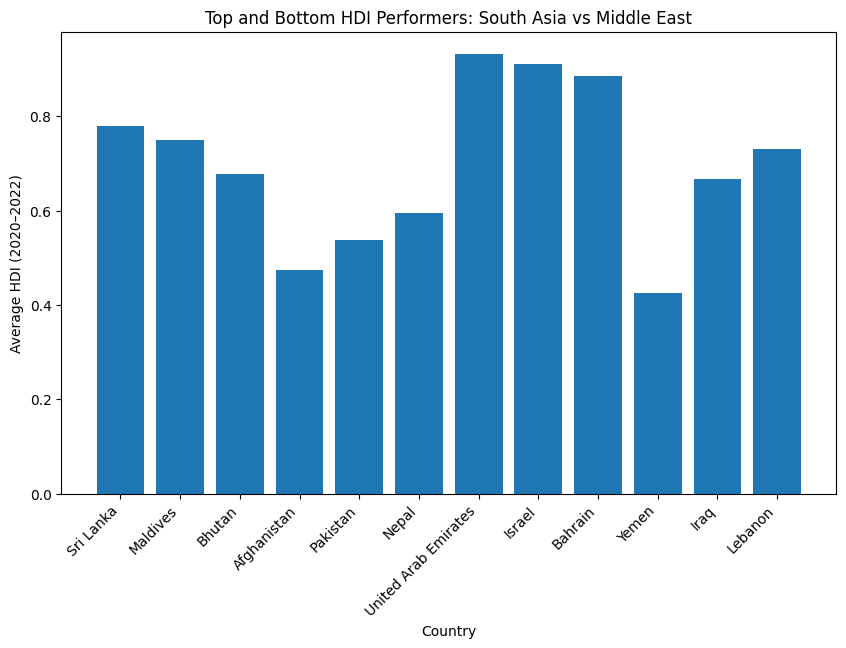

South Asia - Top 3


,country,hdi
7,Sri Lanka,0.780000
4,Maldives,0.750667
2,Bhutan,0.677667


South Asia - Bottom 3


,country,hdi
0,Afghanistan,0.474333
6,Pakistan,0.537667
5,Nepal,0.595000


Middle East - Top 3


,country,hdi
9,United Arab Emirates,0.932667
2,Israel,0.910667
0,Bahrain,0.885333


Middle East - Bottom 3


,country,hdi
10,Yemen,0.426333
1,Iraq,0.667000
5,Lebanon,0.730000


In [51]:
# Load datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Compute average HDI per country (2020–2022)
sa_avg = sa.groupby("country")["hdi"].mean().reset_index()
me_avg = me.groupby("country")["hdi"].mean().reset_index()

# Top and bottom 3 countries
sa_top = sa_avg.sort_values("hdi", ascending=False).head(3)
sa_bottom = sa_avg.sort_values("hdi").head(3)

me_top = me_avg.sort_values("hdi", ascending=False).head(3)
me_bottom = me_avg.sort_values("hdi").head(3)

# Combine for plotting
plot_df = pd.concat([
    sa_top.assign(Region="South Asia (Top)"),
    sa_bottom.assign(Region="South Asia (Bottom)"),
    me_top.assign(Region="Middle East (Top)"),
    me_bottom.assign(Region="Middle East (Bottom)")
])

# -----------------------------
# Bar Chart
# -----------------------------
plt.figure(figsize=(10, 6))
plt.bar(plot_df["country"], plot_df["hdi"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")

plt.savefig("Figure_Top_Bottom_HDI_Regions.png", dpi=300, bbox_inches="tight")
plt.show()

# Display tables
print("South Asia - Top 3")
display(sa_top)

print("South Asia - Bottom 3")
display(sa_bottom)

print("Middle East - Top 3")
display(me_top)

print("Middle East - Bottom 3")
display(me_bottom)

4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.

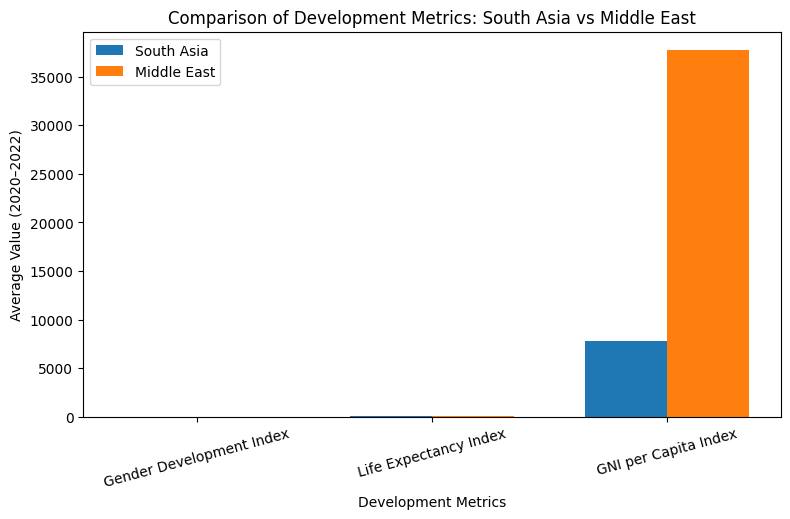

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Correct column names
metrics = {
    "gender_development": "Gender Development Index",
    "life_expectancy": "Life Expectancy Index",
    "gross_inc_percap": "GNI per Capita Index"
}

# Compute regional averages (2020–2022)
sa_means = sa[list(metrics.keys())].mean()
me_means = me[list(metrics.keys())].mean()

# Prepare data for plotting
labels = list(metrics.values())
sa_values = sa_means.values
me_values = me_means.values

x = np.arange(len(labels))
width = 0.35

# Plot grouped bar chart
plt.figure(figsize=(9, 5))
plt.bar(x - width/2, sa_values, width, label="South Asia")
plt.bar(x + width/2, me_values, width, label="Middle East")

plt.xticks(x, labels, rotation=15)
plt.ylabel("Average Value (2020–2022)")
plt.xlabel("Development Metrics")
plt.title("Comparison of Development Metrics: South Asia vs Middle East")
plt.legend()

plt.savefig("Figure_Metric_Comparison_Regions.png", dpi=300, bbox_inches="tight")
plt.show()


5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.
• Identify which region exhibits more variation in HDI.

In [53]:
# Load datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Function to compute disparity measures
def hdi_disparity(df):
    hdi_mean = df["hdi"].mean()
    hdi_std = df["hdi"].std()
    hdi_range = df["hdi"].max() - df["hdi"].min()
    hdi_cv = hdi_std / hdi_mean
    return pd.Series({
        "Mean HDI": hdi_mean,
        "Std Dev": hdi_std,
        "Range": hdi_range,
        "Coefficient of Variation": hdi_cv
    })

# Compute for each region
sa_stats = hdi_disparity(sa)
me_stats = hdi_disparity(me)

# Combine results
disparity_df = pd.DataFrame({
    "South Asia": sa_stats,
    "Middle East": me_stats
})

print("HDI Disparity Measures (2020–2022)")
display(disparity_df)

HDI Disparity Measures (2020–2022)


,South Asia,Middle East
Mean HDI,0.639583,0.788909
Std Dev,0.098273,0.141295
Range,0.321000,0.513000
Coefficient of Variation,0.153652,0.179101


**6. Correlation Analysis:**

 • For each region, compute correlations of HDI with:

 – Gender Development Index

  – Life Expectancy Index

  • Create scatter plots with trendlines for each correlation.
  
   • Interpret the strength and direction of these relationships.

South Asia Correlations
HDI vs Gender Development: 0.8742177004831327
HDI vs Life Expectancy: 0.9387641385416623

Middle East Correlations
HDI vs Gender Development: 0.9356697525724119
HDI vs Life Expectancy: 0.9331227568940162


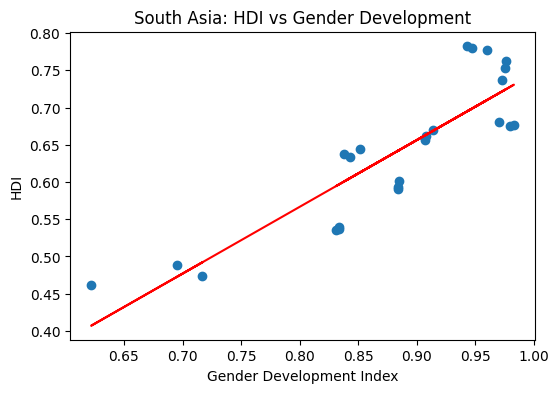

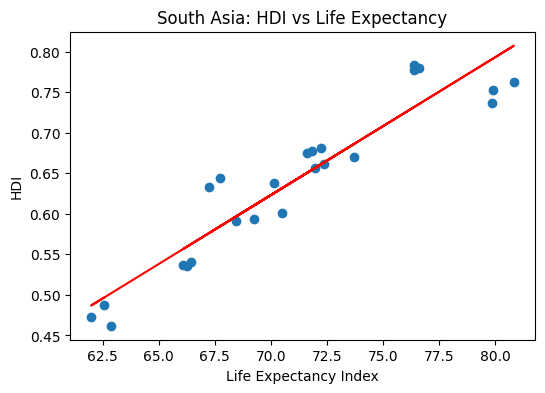

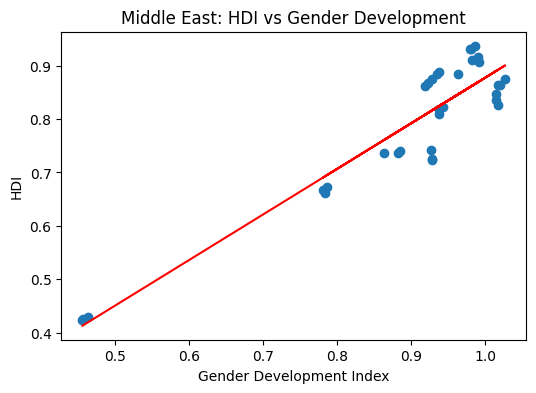

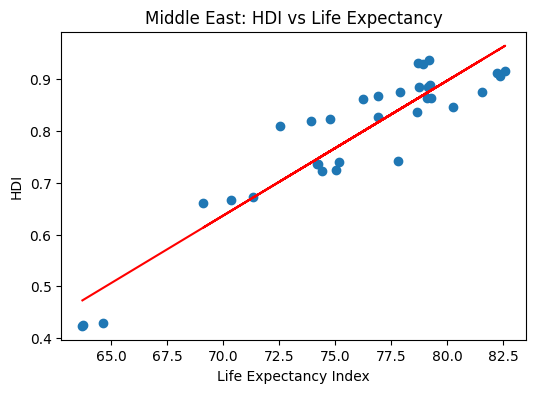

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Correct column names with underscores
cols = ["hdi", "gender_development", "life_expectancy"]

# Select required columns and drop missing values
sa_corr = sa[cols].dropna()
me_corr = me[cols].dropna()

# -----------------------------
# Compute Correlations
# -----------------------------
print("South Asia Correlations")
print("HDI vs Gender Development:", sa_corr["hdi"].corr(sa_corr["gender_development"]))
print("HDI vs Life Expectancy:", sa_corr["hdi"].corr(sa_corr["life_expectancy"]))

print("\nMiddle East Correlations")
print("HDI vs Gender Development:", me_corr["hdi"].corr(me_corr["gender_development"]))
print("HDI vs Life Expectancy:", me_corr["hdi"].corr(me_corr["life_expectancy"]))

# -----------------------------
# Scatter Plot Function
# -----------------------------
def scatter_with_trend(x, y, xlabel, ylabel, title, filename):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y)

    # Trendline
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color="red")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------
# South Asia Plots
# -----------------------------
scatter_with_trend(
    sa_corr["gender_development"], sa_corr["hdi"],
    "Gender Development Index", "HDI",
    "South Asia: HDI vs Gender Development",
    "Figure_SA_HDI_GenderDevelopment.png"
)

scatter_with_trend(
    sa_corr["life_expectancy"], sa_corr["hdi"],
    "Life Expectancy Index", "HDI",
    "South Asia: HDI vs Life Expectancy",
    "Figure_SA_HDI_LifeExpectancy.png"
)

# -----------------------------
# Middle East Plots
# -----------------------------
scatter_with_trend(
    me_corr["gender_development"], me_corr["hdi"],
    "Gender Development Index", "HDI",
    "Middle East: HDI vs Gender Development",
    "Figure_ME_HDI_GenderDevelopment.png"
)

scatter_with_trend(
    me_corr["life_expectancy"], me_corr["hdi"],
    "Life Expectancy Index", "HDI",
    "Middle East: HDI vs Life Expectancy",
    "Figure_ME_HDI_LifeExpectancy.png"
)


**7. Outlier Detection:**

• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.

• Create scatter plots highlighting outliers in a different color.

• Discuss the significance of these outliers.

---



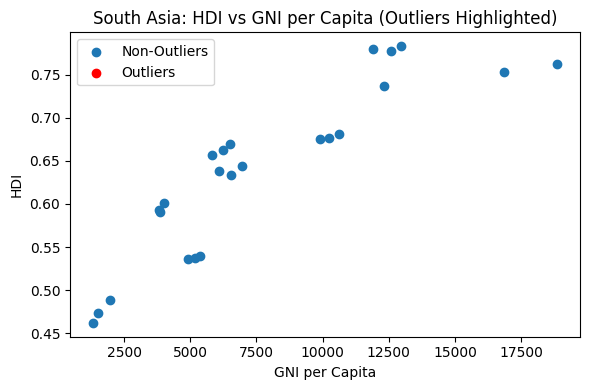

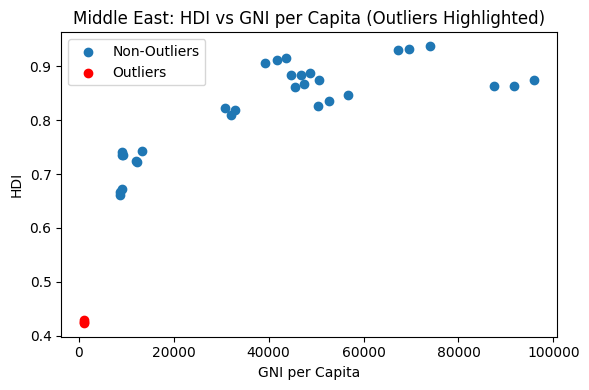

South Asia Outliers:


,country,hdi,gross_inc_percap



Middle East Outliers:


,country,hdi,gross_inc_percap
30,Yemen,0.430,1152.015672
31,Yemen,0.425,1112.162989
32,Yemen,0.424,1105.763435


In [55]:
# Load datasets
sa = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
me = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Keep only relevant columns
cols = ["country", "hdi", "gross_inc_percap"]
sa = sa[cols].dropna()
me = me[cols].dropna()

# -----------------------------
# Function to detect outliers
# -----------------------------
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[col] < lower) | (df[col] > upper)

# Detect outliers for both columns
for df in [sa, me]:
    df["HDI_Outlier"] = detect_outliers(df, "hdi")
    df["GNI_Outlier"] = detect_outliers(df, "gross_inc_percap")
    df["Outlier"] = df["HDI_Outlier"] | df["GNI_Outlier"]

# -----------------------------
# Scatter plot function
# -----------------------------
def scatter_plot(df, region_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(df.loc[~df["Outlier"], "gross_inc_percap"],
                df.loc[~df["Outlier"], "hdi"],
                label="Non-Outliers")
    plt.scatter(df.loc[df["Outlier"], "gross_inc_percap"],
                df.loc[df["Outlier"], "hdi"],
                color="red", label="Outliers")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title(f"{region_name}: HDI vs GNI per Capita (Outliers Highlighted)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figure_{region_name}_HDI_GNI.png", dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------
# Plots
# -----------------------------
scatter_plot(sa, "South Asia")
scatter_plot(me, "Middle East")

# -----------------------------
# Display Outlier Countries
# -----------------------------
print("South Asia Outliers:")
display(sa[sa["Outlier"]][["country", "hdi", "gross_inc_percap"]])

print("\nMiddle East Outliers:")
display(me[me["Outlier"]][["country", "hdi", "gross_inc_percap"]])